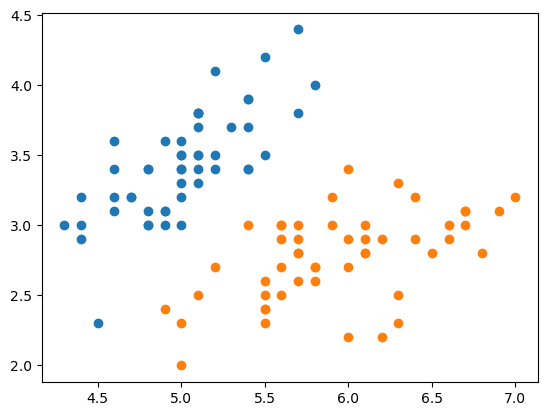

In [1]:
import numpy as np
x = np.linspace(-3, 3, 200)
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[iris.target<2,:2]
y = iris.target[iris.target<2]
import matplotlib.pyplot as plt
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

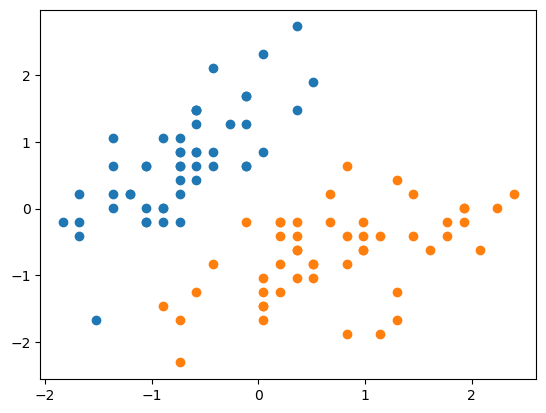

In [2]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
svc = LinearSVC(C = 1e9)
stdscaler = StandardScaler()
stdscaler.fit(X)
X_std = stdscaler.transform(X)
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])

In [3]:
svc.coef_

AttributeError: 'LinearSVC' object has no attribute 'coef_'

In [4]:
svc.fit(X_std, y)

LinearSVC(C=1000000000.0)

In [5]:
svc.coef_

array([[ 4.03244882, -2.50700382]])

In [6]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#EFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    # 绘制margin区域上下两条直线
    w = model.coef_[0]
    b = model.intercept_[0]
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    up_index = np.array((up_y >= axis[2]) & (up_y <= axis[3]))
    down_index = np.array((down_y >= axis[2]) & (down_y <= axis[3]))
    plt.plot(plot_x[up_index], up_y[up_index])
    plt.plot(plot_x[down_index], down_y[down_index])

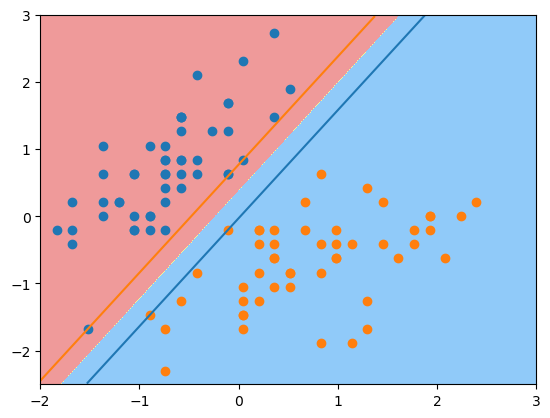

In [7]:
plot_svc_decision_boundary(svc, axis = [-2, 3, -2.5, 3])
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])

In [8]:
svc1 = LinearSVC(C = 0.1)
svc1.fit(X_std, y)

LinearSVC(C=0.1)

Text(0.5, 1.0, 'C=0.1')

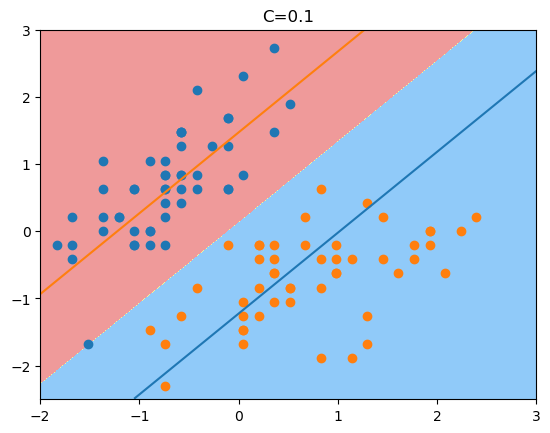

In [10]:
plot_svc_decision_boundary(svc1, axis = [-2, 3, -2.5, 3])
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])
plt.title("C=0.1")